In [8]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score 
from sklearn.metrics import recall_score, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# GRID SEARCHING
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set()

# Read Data

In [3]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(True)

# RandomForestClassifier

In [3]:
# Grid
random_forest_grid={
    "n_estimators": [5, 7, 11],
    "max_features": [.6, .7, .8, .9], 
    "max_depth": np.arange(11, 17, 1),
    "min_samples_split": np.arange(2, 20),
    "min_samples_leaf": (1, 5),
    "max_leaf_nodes": np.arange(200, 600, 10),
    "min_impurity_decrease": np.arange(0, .0001, .00001),
    "class_weight": [{0:n, 1:1-n} for n in np.arange(.1, 1, .1)]
}

In [4]:
%%time

# Grid Search
rfc = RandomForestClassifier()
rf_model = RandomizedSearchCV(rfc, param_distributions=random_forest_grid, scoring='f1', n_iter=100)
rf_model.fit(X_train, y_train)

CPU times: user 2min 14s, sys: 2.85 s, total: 2min 16s
Wall time: 2min 28s


In [5]:
# Predict
y_pred_rf = rf_model.predict(X_test)
y_pp_rf = rf_model.predict_proba(X_test)

In [9]:
print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred_rf)))
print("Model precision: {}".format(precision_score(y_test, y_pred_rf)))
print("Model f1: {}".format(f1_score(y_test, y_pred_rf)))
print("Model accuracy: {}".format(rf_model.score(X_test, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred_rf))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.3
Model precision: 0.34210526315789475
Model f1: 0.319672131147541
Model accuracy: 0.319672131147541

CONFUSION MATRIX
[[2149  150]
 [ 182   78]]

key:
 TN   FP 
 FN   TP 


# Gradient Boosting Classifier

In [10]:
# Grid
gradient_boost_grid={'learning_rate': [ 0.4,  0.5,  0.6,  0.7,  0.8],
                         'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': range(1, 15),
                         'n_estimators': [300]}

In [11]:
%%time

# Grid Search
gbc = GradientBoostingClassifier()
gb_model = RandomizedSearchCV(gbc, param_distributions=gradient_boost_grid, scoring='f1')
gb_model.fit(X_train, y_train)

CPU times: user 3min 43s, sys: 1.54 s, total: 3min 44s
Wall time: 3min 47s


In [12]:
# Predict
y_pred_gb = gb_model.predict(X_test)
y_pp_gb = gb_model.predict_proba(X_test)

In [13]:
print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred_gb)))
print("Model precision: {}".format(precision_score(y_test, y_pred_gb)))
print("Model f1: {}".format(f1_score(y_test, y_pred_gb)))
print("Model accuracy: {}".format(gb_model.score(X_test, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred_gb))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.3346153846153846
Model precision: 0.3175182481751825
Model f1: 0.32584269662921345
Model accuracy: 0.32584269662921345

CONFUSION MATRIX
[[2112  187]
 [ 173   87]]

key:
 TN   FP 
 FN   TP 


# Ada Boost Classifier

In [14]:
# Grid
ada_boost_grid = {
    "n_estimators": range(1, 150, 10),          #  50
    "learning_rate": np.arange(.1, 2, .2),      #  1
}


In [15]:
%%time

# Grid Search
abc = AdaBoostClassifier()
ab_model = RandomizedSearchCV(abc, param_distributions=ada_boost_grid, scoring='f1', n_jobs=-1)
ab_model.fit(X_train, y_train)

CPU times: user 3.61 s, sys: 241 ms, total: 3.85 s
Wall time: 25.9 s


In [16]:
# Predict
y_pred_ab = ab_model.predict(X_test)
y_pp_ab = ab_model.predict_proba(X_test)

In [17]:
print("\nMETRICS")
print("Model recall: {:.3f}".format(recall_score(y_test, y_pred_ab)))
print("Model precision: {}".format(precision_score(y_test, y_pred_ab)))
print("Model f1: {}".format(f1_score(y_test, y_pred_ab)))
print("Model accuracy: {}".format(ab_model.score(X_test, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred_ab))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.177
Model precision: 0.37398373983739835
Model f1: 0.24020887728459533
Model accuracy: 0.24020887728459533

CONFUSION MATRIX
[[2222   77]
 [ 214   46]]

key:
 TN   FP 
 FN   TP 


# LOGISTIC REGRESSION (because why not?)

In [38]:
lin_mod = LogisticRegression()
lin_mod.fit(X_train, y_train)
y_pred_lr = lin_mod.predict(X_test)
y_pp_lr = lin_mod.predict_proba(X_test)

In [39]:
y_pred= y_pred_lr

print("\nMETRICS")
print("Model recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))
print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred_ab))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.042
Model precision: 0.5
Model f1: 0.07801418439716314
Model accuracy: 0.8983978116451738

CONFUSION MATRIX
[[2222   77]
 [ 214   46]]

key:
 TN   FP 
 FN   TP 


# NEURAL NETS

In [36]:
nn_model = LogisticRegression()
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
y_pp_nn = nn_model.predict_proba(X_test)

In [37]:
y_pred= y_pred_nn


print("\nMETRICS")
print("Model recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))
print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred_ab))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.042
Model precision: 0.5
Model f1: 0.07801418439716314
Model accuracy: 0.8983978116451738

CONFUSION MATRIX
[[2222   77]
 [ 214   46]]

key:
 TN   FP 
 FN   TP 


# COMBINE

In [22]:
models = ['rf','gb','ab','lr','nn']
predictions = [y_pred_rf,y_pred_gb,y_pred_ab,y_pred_lr,y_pred_nn]
probabilities = [y_pp_rf,y_pp_gb,y_pp_ab,y_pp_lr,y_pp_nn]

results = pd.DataFrame(
    {'y_test': y_test,
     
     'rf': y_pred_rf,
     'gb': y_pred_gb,
     'ab': y_pred_ab,
     'lr': y_pred_lr,
     'nn': y_pred_nn,
    
     "rf_pp": y_pp_rf[:,1],
     "gb_pp": y_pp_gb[:,1],
     "ab_pp": y_pp_ab[:,1],
     "lr_pp": y_pp_lr[:,1],
     'nn_pp': y_pp_nn[:,1],
    })

In [23]:
results['s'] = results.ab+results.gb+results.rf+results.lr+results.nn
results["s_pp"] = results.ab_pp+results.gb_pp+results.rf_pp+results.lr_pp+results.nn_pp
results['p'] = results['s'].apply(lambda x: 1 if x > 0 else 0)

# Voting

In [27]:
y_pred = results['p']

In [28]:
print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))
print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.5576923076923077
Model precision: 0.30145530145530147
Model f1: 0.39136302294197034
Model accuracy: 0.8237592809691285

CONFUSION MATRIX
[[1963  336]
 [ 115  145]]

key:
 TN   FP 
 FN   TP 


0.714625924315


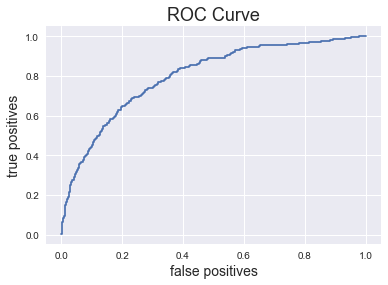

In [29]:
print(roc_auc_score(y_test, results.s))
y = roc_curve(y_test, results.s_pp)

plt.plot(y[0], y[1])
plt.xlabel("false positives", fontsize=14)
plt.ylabel("true positives", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig(readme_file_path+"roc.png")
plt.show()

0.391363022942


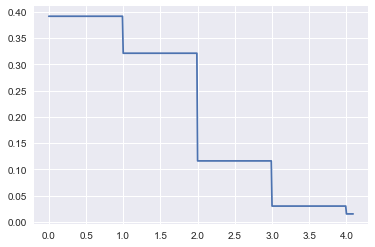

In [30]:
f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 4.1, .01):
    y_pred = results['s'].apply(lambda x: 1 if x > cutoff else 0)
    f1.append(f1_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
        
print(max(f1))
plt.plot(np.arange(0, 4.1, .01), f1)
plt.show()

In [32]:
recalls = []
precisions = []
accuracies = []
fones = []

y_pp = results['s']
x = np.arange(0, 4, .1)
for cutoff in x:
    y_pred = y_pp.apply(lambda x: 1 if x > cutoff else 0)
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_pred, y_test))
    fones.append(f1_score(y_test, y_pred))


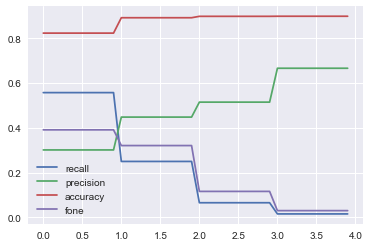

In [33]:
plt.plot(x, recalls)
plt.plot(x, precisions)
plt.plot(x, accuracies)
plt.plot(x, fones)
plt.legend(['recall', 'precision', 'accuracy', 'fone'])
plt.show()

# Adding Probabilities

0.798912570683


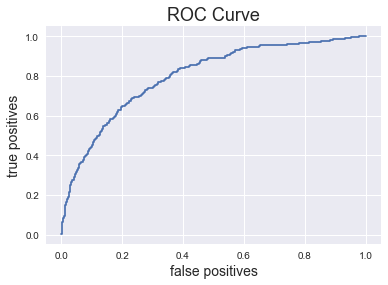

In [24]:
print(roc_auc_score(y_test, results.s_pp))
y = roc_curve(y_test, results.s_pp)

plt.plot(y[0], y[1])
plt.xlabel("false positives", fontsize=14)
plt.ylabel("true positives", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig(readme_file_path+"roc.png")
plt.show()

0.799220396828


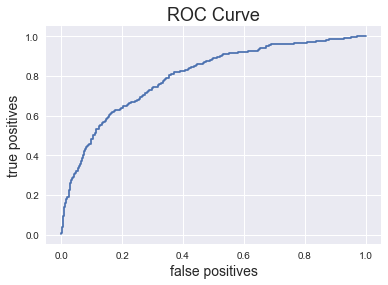

In [53]:
print(roc_auc_score(y_test, results.s_pp))
y = roc_curve(y_test, results.s_pp)

plt.plot(y[0], y[1])
plt.xlabel("false positives", fontsize=14)
plt.ylabel("true positives", fontsize=14)
plt.title("ROC Curve", fontsize=18)
plt.savefig(readme_file_path+"roc.png")
plt.show()

0.393351800554


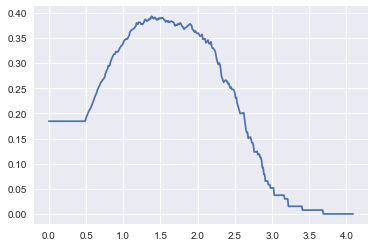

In [26]:
f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 4.1, .01):
    results['p_pp'] = results['s_pp'].apply(lambda x: 1 if x > cutoff else 0)
    f1.append(f1_score(y_test, results['p_pp']))
    precision.append(precision_score(y_test, results['p_pp']))
    recall.append(recall_score(y_test, results['p_pp']))
        
print(max(f1))
plt.plot(np.arange(0, 4.1, .01), f1)
plt.show()

0.414985590778


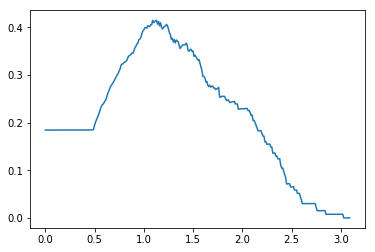

In [39]:
f1 = []
precision = []
recall = []
for cutoff in np.arange(0, 3.1, .01):
    results['p_pp'] = results['s_pp'].apply(lambda x: 1 if x > cutoff else 0)
    f1.append(f1_score(y_test, results['p_pp']))
    precision.append(precision_score(y_test, results['p_pp']))
    recall.append(recall_score(y_test, results['p_pp']))
    
print(max(f1))
plt.plot(np.arange(0, 3.1, .01), f1)
plt.show()

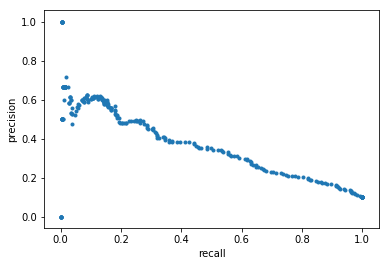

In [40]:
plt.scatter(recall, precision, marker='.')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [77]:
recalls = []
precisions = []
accuracies = []
fones = []

y_pp = results['s_pp']
x = np.arange(0, 4, .1)
for cutoff in x:
    y_pred = y_pp.apply(lambda x: 1 if x > cutoff else 0)
    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_pred, y_test))
    fones.append(f1_score(y_test, y_pred))


# print("\nMETRICS")
# print("Model recall: {}".format(recall_score(y_test, y_pred)))
# print("Model precision: {}".format(precision_score(y_test, y_pred)))
# print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))
# print("Model f1: {}".format(f1_score(y_test, y_pred)))

# print ("\nCONFUSION MATRIX")
# print (confusion_matrix(y_test, y_pred))
# print ("\nkey:")
# print (" TN   FP ")
# print (" FN   TP ")

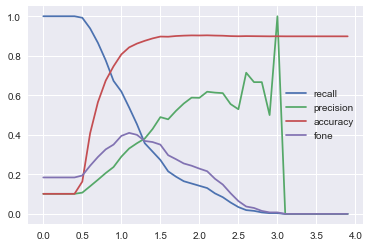

In [78]:
plt.plot(x, recalls)
plt.plot(x, precisions)
plt.plot(x, accuracies)
plt.plot(x, fones)
plt.legend(['recall', 'precision', 'accuracy', 'fone'])
plt.show()

recalls

In [81]:
cutoff = x[fones.index(max(fones))]

y_pred = y_ pp.apply(lambda x: 1 if x > cutoff else 0)

print("\nMETRICS")
print("Model recall: {}".format(recall_score(y_test, y_pred)))
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model accuracy: {}".format(accuracy_score(y_pred, y_test)))
print("Model f1: {}".format(f1_score(y_test, y_pred)))

print ("\nCONFUSION MATRIX")
print (confusion_matrix(y_test, y_pred))
print ("\nkey:")
print (" TN   FP ")
print (" FN   TP ")


METRICS
Model recall: 0.5384615384615384
Model precision: 0.3309692671394799
Model accuracy: 0.8425166080500195
Model f1: 0.4099560761346998

CONFUSION MATRIX
[[2016  283]
 [ 120  140]]

key:
 TN   FP 
 FN   TP 
